## Data Preprocessing & Feature Engineering

In [78]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the Excel Data as Pandas DataFrame

In [79]:
df = pd.read_excel('C://Users//TMB CO//OneDrive//Desktop//MACHINE LEARNING PROJECT (GITHUB)//Machine-learning-end-to-end-project//cleaned_data.xlsx')

Show Top 5 Records

In [80]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [81]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## Multi-Class Classification

The multi-class classification has at least two mutually exclusive class labels, where the goal is to predict to which class a given input example belongs to. 

Most of the binary classification algorithms can be also used for multi-class classification. These algorithms include but are not limited to:

- Random Forest <br>
- Naive Bayes <br>
- K-Nearest Neighbors <br>
- Gradient Boosting <br>
- SVM <br>
- Logistic Regression <br>

__Note:__<br> Using conventional predictive models such as __Decision Trees__, __Logistic Regression__, etc. could not be effective when dealing with an imbalanced dataset, because they might be biased toward predicting the class with the highest number of observations, and considering those with fewer numbers as noise. 

### Metrics to Evaluate Machine Learning Classification Algorithms

### __Confusion matrix__ <br>
The confusion matrix is a table that represents the predicted and actual labels for a classification problem. It is typically organized into four quadrants. By analyzing the confusion matrix, you can derive various evaluation metrics that help assess the model's performance.

<table style="border-collapse: collapse; border: 2px solid black;">
  <tr>
    <th style="border: 2px solid black;"> </th>
    <th style="border: 2px solid black;">YES</th>
    <th style="border: 2px solid black;">NO</th>
  </tr>
  <tr>
    <th style="border: 2px solid black;">YES</th>
    <td style="border: 1px solid black;">True Positives (TP)</td>
    <td style="border: 1px solid black;">False Negatives (FN)</td>
  </tr>
  <tr>
    <th style="border: 2px solid black;">NO</th>
    <td style="border: 1px solid black;">False Positives (FP)</td>
    <td style="border: 1px solid black;">True Negatives (TN)</td>
  </tr>
</table>

- __True Positives (TP):__ The number of correctly predicted positive instances.<br>
- __False Positives (FP):__ The number of incorrectly predicted positive instances.<br>
- __True Negatives (TN):__ The number of correctly predicted negative instances.<br>
- __False Negatives (FN):__ The number of incorrectly predicted negative instances.<br>

__Note:__ False Positives and False Negatives are Type I & II errors, respectively.

#### **Calculate Basic Metrics from the confusion matrix**

- __Accuracy:__ It measures the overall correctness of the model's predictions and is calculated as (TP + TN) / (TP + FP + TN + FN).<br>
- __Precision:__ It indicates the proportion of correctly predicted positive instances out of all instances predicted as positive, calculated as TP / (TP + FP).<br>
- __Recall (Sensitivity or True Positive Rate):__ It represents the proportion of correctly predicted positive instances out of all actual positive instances, calculated as TP / (TP + FN).<br>
- __Specificity (True Negative Rate):__ It denotes the proportion of correctly predicted negative instances out of all actual negative instances, calculated as TN / (TN + FP).<br>
- __F1-Score:__ It is the harmonic mean of precision and recall, providing a single metric that balances both values. It is calculated as 2 * (Precision * Recall) / (Precision + Recall).<br>

- __AUC - ROC Curve:__ AUC - ROC Curve generates probability values instead of binary (0 or 1). It should be used when data is roughly balanced. ROC Curves provides a good overview of trade-off between the TP rate and FP rate for binary classifier using different thresholds.<br>
A value below 0.5 indicates a poor classifier.<br>
A value of 0.5 means random classifier.<br>
A value over 0.7 corresponds to a good classifier.<br>
A value of 0.8 indicates a strong classifier.<br>
We have 1 when the classifier perfectly predicts everything.<br>
(Source: https://www.datacamp.com/blog/classification-machine-learning)

##### The confusion matrix helps to interpret and gain insights into the model's performance by analyzing the distribution of predictions across the four quadrants:

#### **How to choose the right metric**

__Choose accuracy__<br>
- The cost of FP and FN are roughly equal.<br>
- The benefit of TP and TN are roughly equal.<br>

__Choose recall__<br>
- The cost of FN is much higher than a FP.<br>
- The cost of a TN is much higher than a TP.<br>

__ROC AUC & Precision - Recall curves__<br>
- Use ROC when dealing with balanced data sets.<br>
- Use precision-recall for imbalanced data sets.

### **Let us understand the ratio of our target variable** as this will help us weither to apply SMOTENN or train the models without SMOTENN.

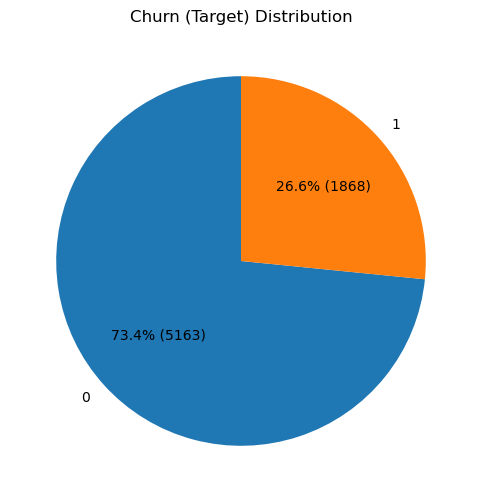

In [82]:
# Convert DataFrame to seaborn-compatible format
data = df['Churn'].value_counts().reset_index().rename(columns={'index':'Type'})

# Plot the pie chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(x=data['Churn'], labels=data['Type'], autopct=lambda pct: f"{pct:.1f}% ({int(pct/100*sum(data['Churn']))})", startangle=90)
plt.title('Churn (Target) Distribution')
plt.show()

#### Preparing X and Y variables

In [83]:
X = df.drop(columns=['Churn'],axis=1)

In [84]:
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [85]:
y = df['Churn']

In [86]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [87]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [88]:
X = preprocessor.fit_transform(X)

In [89]:
X.shape

(7032, 45)

In [90]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5625, 45), (1407, 45))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.51      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407

KNN Accuracy: 0.7547974413646056


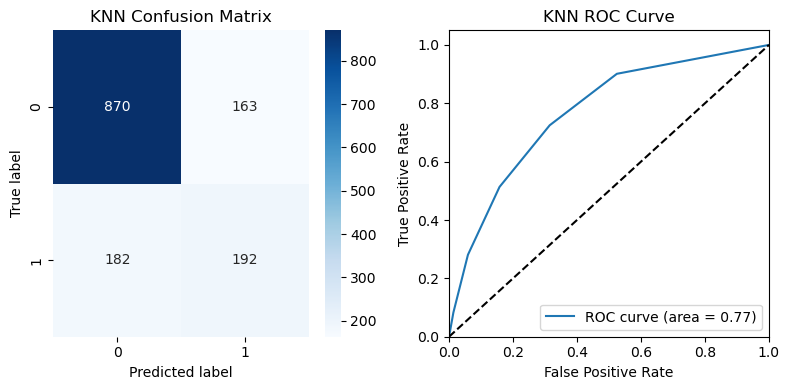

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_proba = knn.predict_proba(X_test)[:, 1]
y_pred = knn.predict(X_test)

# Compute precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("KNN Classification Report:")
print(report)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot confusion matrix and ROC curve side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("KNN Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")

# ROC curve
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('KNN ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1033
           1       0.46      0.48      0.47       374

    accuracy                           0.71      1407
   macro avg       0.63      0.64      0.64      1407
weighted avg       0.72      0.71      0.71      1407

Decision Tree Accuracy: 0.7121535181236673


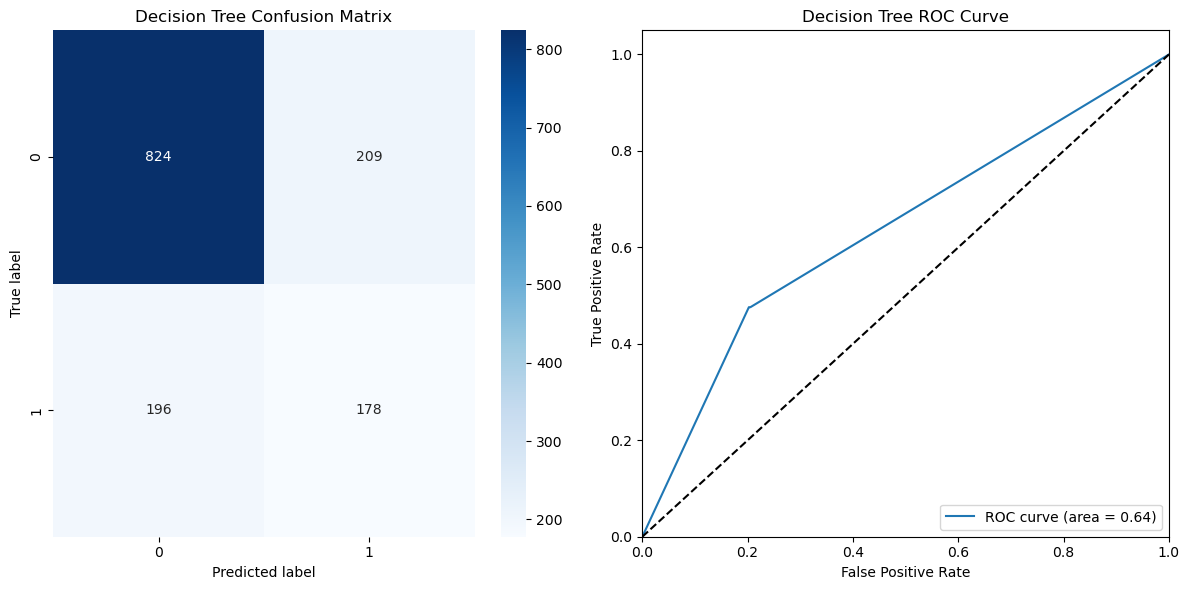

In [93]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

# Compute precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Decision Tree Classification Report:")
print(report)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot confusion matrix and ROC curve side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")

# ROC curve
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Decision Tree ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

SVM Accuracy: 0.7903340440653873


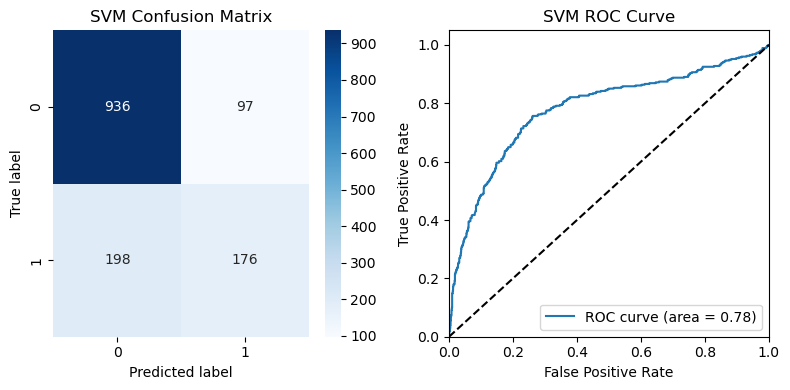

In [98]:
from sklearn.svm import SVC

svm = SVC(random_state=42, probability=True)
svm.fit(X_train, y_train)
y_pred_proba = svm.predict_proba(X_test)[:, 1]
y_pred = svm.predict(X_test)

# Compute precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("SVM Classification Report:")
print(report)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot confusion matrix and ROC curve side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")

# ROC curve
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('SVM ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Random Forest Accuracy: 0.7803837953091685


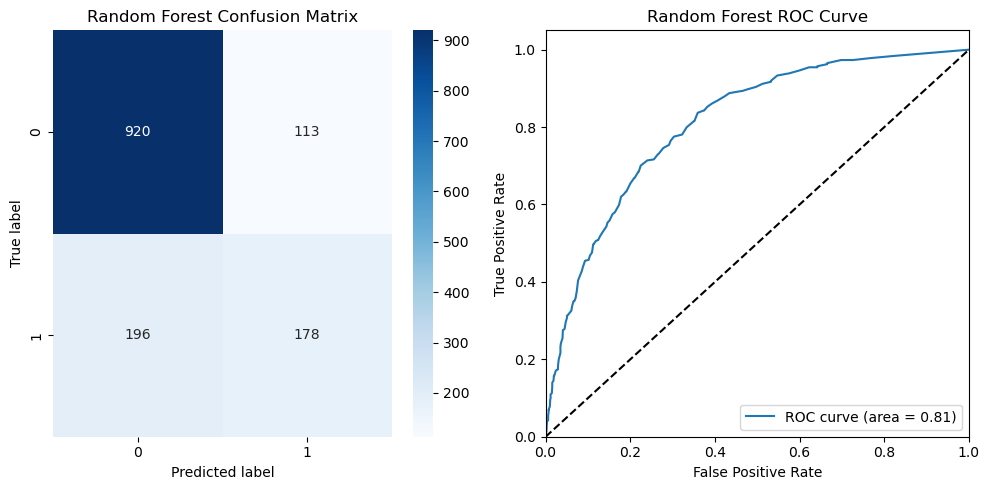

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

# Compute precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:")
print(report)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot confusion matrix and ROC curve side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")

# ROC curve
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Random Forest ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

XGBoost Accuracy: 0.775408670931059


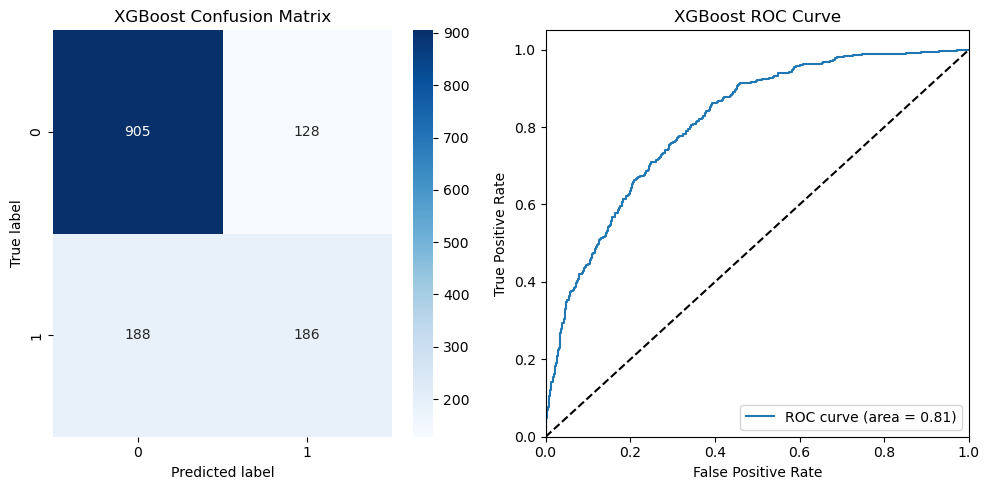

In [95]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred = xgb_model.predict(X_test)

# Compute precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("XGBoost Classification Report:")
print(report)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot confusion matrix and ROC curve side by side
fig, axes = plt.subplots(1,2, figsize=(10, 5))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("XGBoost Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")

# ROC curve
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('XGBoost ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

LGBM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

LGBM Accuracy: 0.7860696517412935


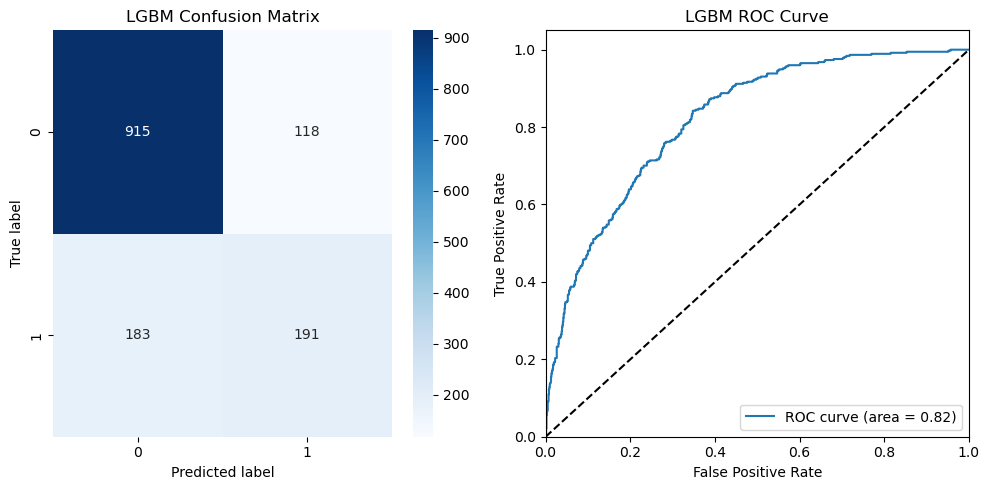

In [96]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
y_pred = lgb_model.predict(X_test)

report = classification_report(y_test, y_pred)
print("LGBM Classification Report:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
print("LGBM Accuracy:", accuracy)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("LGBM Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")

axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('LGBM ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

CatBoost Accuracy: 0.7867803837953091


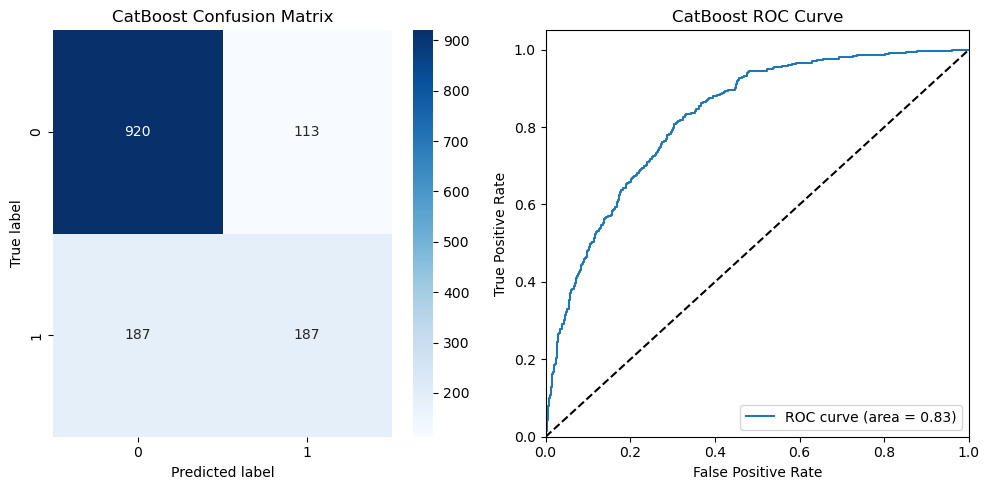

In [97]:
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix

cb_model = cb.CatBoostClassifier(random_state=42, verbose=False) # verbose parameter is set to false
cb_model.fit(X_train, y_train)
y_pred_proba = cb_model.predict_proba(X_test)[:, 1]
y_pred = cb_model.predict(X_test)

report = classification_report(y_test, y_pred)
print("CatBoost Classification Report:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Accuracy:", accuracy)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("CatBoost Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")

axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('CatBoost ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()